In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [ ]:
file = '5_OneCatSevNumOrdered.csv'

In [ ]:
df = pd.read_csv(file)
df.head()

,year,sex,name,n,prop
0,1880,F,Helen,636,0.006516
1,1880,F,Amanda,241,0.002469
2,1880,F,Betty,117,0.001199
3,1880,F,Dorothy,112,0.001147
4,1880,F,Linda,27,0.000277


### Simple bar plot
Create a simple bar plot of the frequency of each name overall.
(matplotlib)

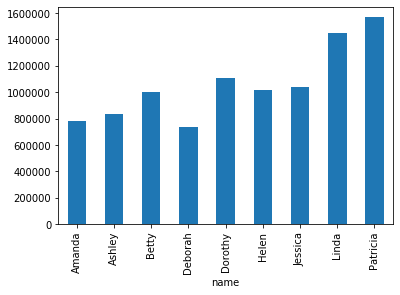

In [ ]:
df.groupby(['name'])['n'].sum().plot(kind="bar")

### Grouped bar plot
Now let’s re-create this plot from the article using seaborn.
Make sure you are using a similar color palette, the same years and names.

In [ ]:
# 1920, 1960, 2000
y1920 = df['year'] == 1920
y1960 = df['year'] == 1960
y2000 = df['year'] == 2000
y_selection = (y1920 | y1960 | y2000)

name1 = df['name'] == 'Ashley'
name2 = df['name'] == 'Betty'
name3 = df['name'] == 'Helen'
name4 = df['name'] == 'Patricia'
name_selection = (name1 | name2 | name3 | name4)

selection = (y_selection & name_selection)
df_extract = df[selection]
df_extract = df_extract.sort_values('name', ascending=True)

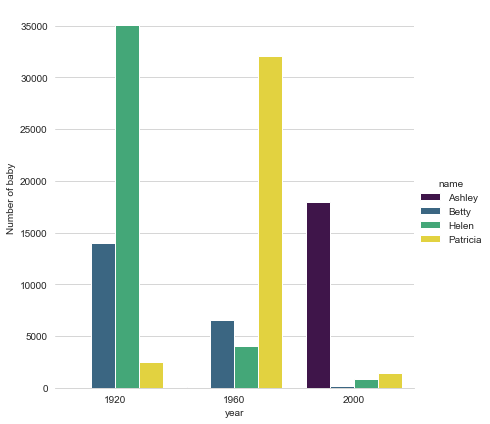

In [ ]:
colors = ['#440c53','#2f688e','#34b779','#fde825']
sns.set_style('whitegrid')
g = sns.catplot(x="year", y="n", hue="name", data=df_extract,
                height=6, kind="bar", 
                palette=sns.color_palette(colors))
g.despine(left=True)
g.set_ylabels("Number of baby")

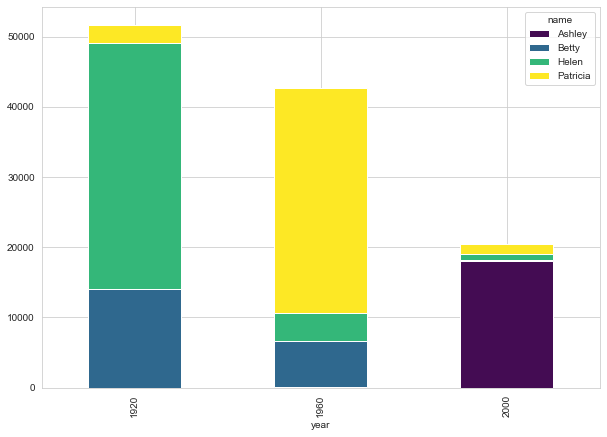

In [ ]:
df_pivot = df_extract[['year','name','n']]
df_pivot = df_pivot.pivot(index='year', columns='name', values='n')
df_pivot.loc[:,['Ashley','Betty', 'Helen', 'Patricia']].plot.bar(stacked=True, color=colors, figsize=(10,7))